In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu

In [19]:
import os
cwd = os.getcwd()
file_path = os.path.join(cwd, 'data/diabetes.csv')

In [20]:
# Cek direktori
cwd

'C:\\Users\\VivoBook\\Desktop\\Jupyter Notebook\\PENGENALAN POLA'

In [21]:
# Load data
data = np.loadtxt('C:\\Users\\VivoBook\\Desktop\\Jupyter Notebook\\PENGENALAN POLA\\data\\diabetes.csv', delimiter=',', dtype=float)

In [22]:
features = data[:, 0:8]
labels = data[:, 8]

In [23]:
scaler = MinMaxScaler()

features = scaler.fit_transform(features)

In [24]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels)

In [25]:
# Membuat Model Neural Network
model = Sequential()
model.add(Dense(units = 100, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units = 50, activation=relu))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

In [26]:
# Membuat data latih dan data tes
acc_training = model.fit(training_data, training_label, 
                         validation_data=(testing_data, testing_label),
                         batch_size=32, epochs=25)
acc_testing = model.evaluate(testing_data, testing_label)

Epoch 1/25
20/20 [==============================] - 1s 16ms/step - loss: 0.6614 - accuracy: 0.6515 - val_loss: 0.6526 - val_accuracy: 0.6494
Epoch 2/25
20/20 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6498 - val_loss: 0.6403 - val_accuracy: 0.6494
Epoch 3/25
20/20 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.6498 - val_loss: 0.6287 - val_accuracy: 0.6818
Epoch 4/25
20/20 [==============================] - 0s 4ms/step - loss: 0.6022 - accuracy: 0.6759 - val_loss: 0.6195 - val_accuracy: 0.6688
Epoch 5/25
20/20 [==============================] - 0s 4ms/step - loss: 0.5817 - accuracy: 0.6824 - val_loss: 0.6128 - val_accuracy: 0.6688
Epoch 6/25
20/20 [==============================] - 0s 4ms/step - loss: 0.5658 - accuracy: 0.6873 - val_loss: 0.6043 - val_accuracy: 0.6494
Epoch 7/25
20/20 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7280 - val_loss: 0.5957 - val_accuracy: 0.6688
Epoch 8/25
20/20 [=

In [27]:
print('Akurasinya adalah: {}'.format(acc_testing[1]))

Akurasinya adalah: 0.701298713684082


In [28]:
hist = acc_training.history

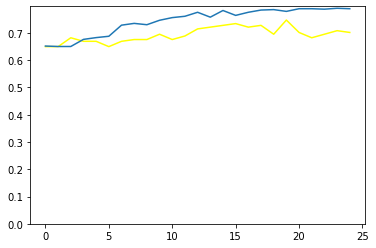

In [29]:
# Hasil Plot daro Model yang dibuat
f, ax = plt.subplots(1)
ax.plot(hist['val_accuracy'], c = 'yellow')
ax.plot(hist['accuracy'])
ax.set_ylim(ymin=0)
plt.show(f)